In [6]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (1).csv


<ipython-input-7-d3b29bf552d4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
<ipython-input-7-d3b29bf552d4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

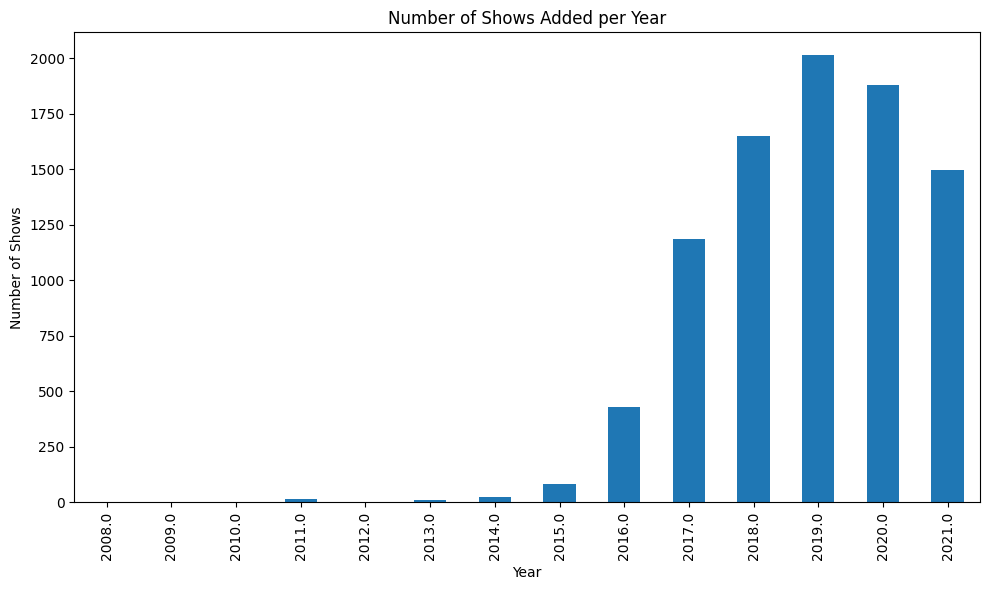

<ipython-input-7-d3b29bf552d4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


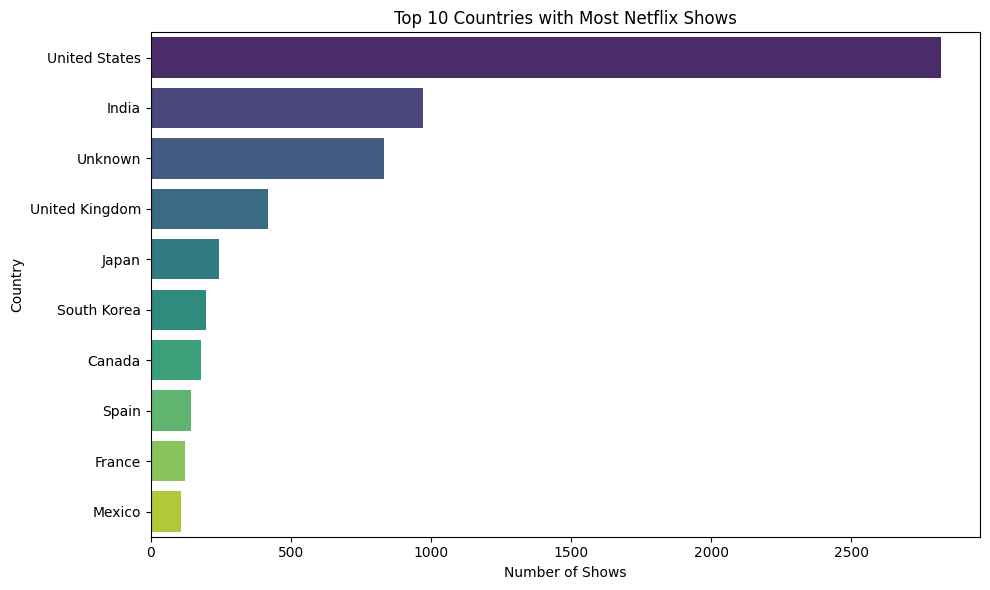

<ipython-input-7-d3b29bf552d4>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


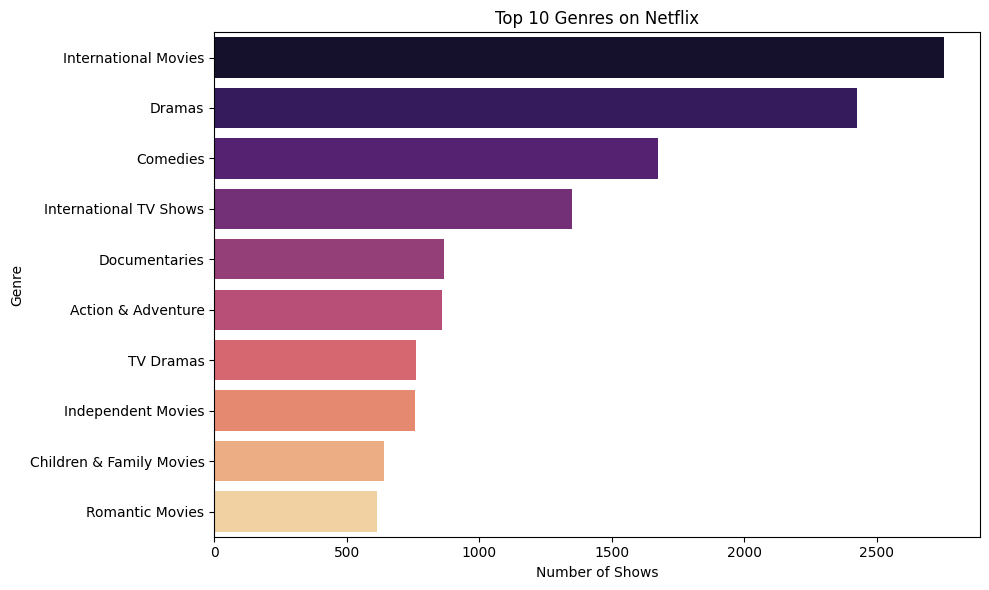

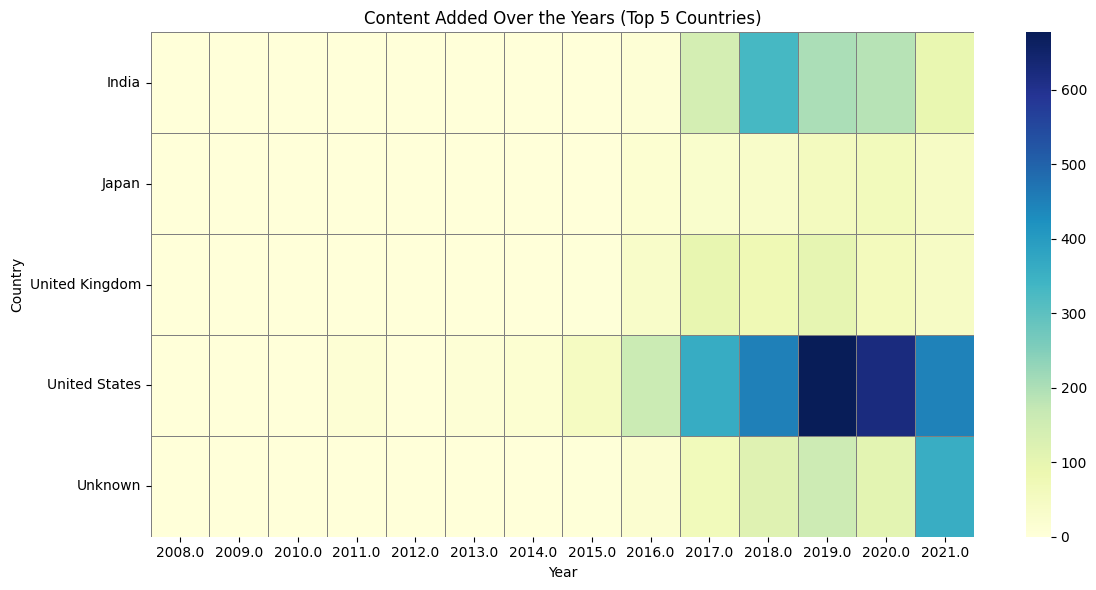

Analysis complete.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')


df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['listed_in'].fillna('Unknown', inplace=True)


plt.figure(figsize=(10, 6))
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Shows Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Netflix Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
genres = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


top5_countries = df['country'].value_counts().head(5).index
df_top5 = df[df['country'].isin(top5_countries)]
heatmap_data = df_top5.groupby(['country', 'year_added']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Content Added Over the Years (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print("Analysis complete.")


## 📌 Conclusion

- Most Netflix content was added after 2016.
- The USA is the top producer of Netflix content, followed by India and the UK.
- Popular genres include Drama, Comedy, and International TV Shows.
- The heatmap shows rapid growth in content across top countries post-2015.
